In [25]:
import pandas as pd
import numpy as np
mydata = pd.read_csv("Credit.csv")



In [27]:
mydata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [28]:
print(mydata.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [29]:
# Extracting the counts of unique values in the "type" column
type_counts = mydata["type"].value_counts()
type_counts

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [30]:
# Extracting the unique transaction types (index of the type_counts Series)
transactions = type_counts.index
transactions

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

In [31]:
# Extracting the corresponding quantities (values of the type_counts Series)
quantity = type_counts.values
quantity

array([2237500, 2151495, 1399284,  532909,   41432])

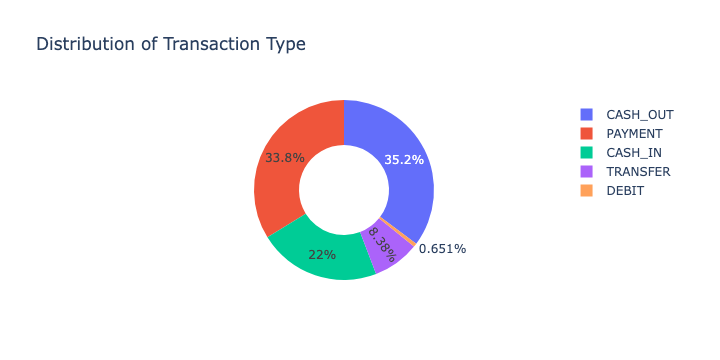

In [32]:
import plotly.express as px
figure = px.pie(mydata, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

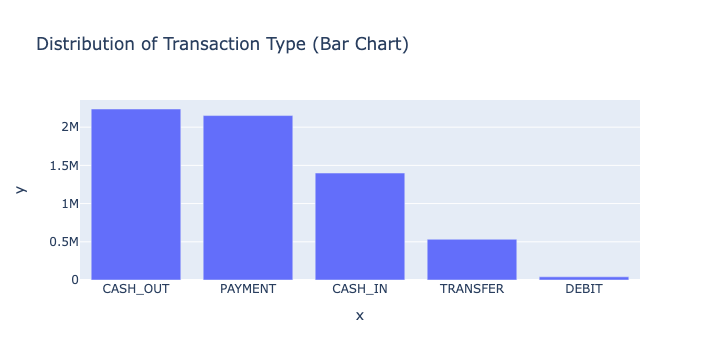

In [34]:
import plotly.express as px

# Creating a bar chart
bar_figure = px.bar(mydata, x=transactions, y=quantity, 
                    title="Distribution of Transaction Type (Bar Chart)")
bar_figure.show()


In [35]:
# Checking correlation
correlation = mydata.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


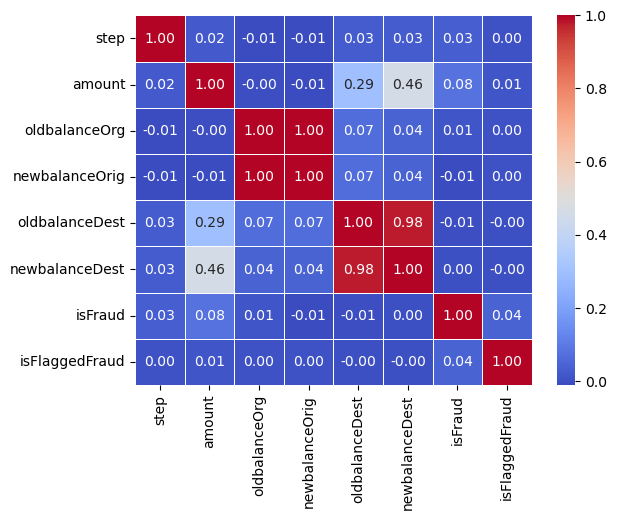

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation' is your correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

In [37]:
# Mapping categorical values in the "type" column to numerical values
mydata["type"] = mydata["type"].map({
    "CASH_OUT": 1,
    "PAYMENT": 2,
    "CASH_IN": 3,
    "TRANSFER": 4,
    "DEBIT": 5
})
# Mapping numerical values in the "isFraud" column to descriptive labels
mydata["isFraud"] = mydata["isFraud"].map({
    0: "No Fraud",
    1: "Fraud"
})

In [38]:
mydata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [39]:
mydata.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [40]:
# splitting the data
from sklearn.model_selection import train_test_split

# Features (x)
X = mydata[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]

# Target variable (y)
y = mydata["isFraud"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
# Create a Decision Tree Classifier
base_model = DecisionTreeClassifier()


In [44]:
# Create the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='accuracy')


In [45]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [121]:
# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [175]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Training the model
best_model.fit(X_train, y_train)

# Evaluating the model on the test set
accuracy =best_model.score(X_test, y_test)

# Printing the accuracy
print(accuracy)


In [ ]:
# Define feature names
feature_names = ["type", "amount", "oldbalanceOrg", "newbalanceOrig"]

# New set of features for prediction
new_features = np.array([[1, 5000.0, 3000.0, 2000.0]])

# Create a DataFrame with feature names
new_features_df = pd.DataFrame(new_features, columns=feature_names)

# Make predictions
new_prediction = best_model.predict(new_features_df)

print("Predicted class:", new_prediction)
